<a href="https://colab.research.google.com/github/Gweneal3/DeepLearning_YT/blob/master/Face%20Mask%20Detection/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [86]:
!kaggle datasets download omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [88]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependecies

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [90]:
with_mask_file = os.listdir("/content/data/with_mask") # create a list, store all the file name in the with_mask folder
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_3656.jpg', 'with_mask_3712.jpg', 'with_mask_1757.jpg', 'with_mask_2102.jpg', 'with_mask_2460.jpg']
['with_mask_3544.jpg', 'with_mask_1455.jpg', 'with_mask_1668.jpg', 'with_mask_1393.jpg', 'with_mask_975.jpg']


In [91]:
without_mask_file = os.listdir("/content/data/without_mask")
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_2458.jpg', 'without_mask_3525.jpg', 'without_mask_3457.jpg', 'without_mask_3633.jpg', 'without_mask_2870.jpg']
['without_mask_3247.jpg', 'without_mask_1488.jpg', 'without_mask_3389.jpg', 'without_mask_2048.jpg', 'without_mask_3325.jpg']


In [92]:
print("Number of with mask images:",len(with_mask_file))
print("Number of without mask images:",len(without_mask_file))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the 2 class of Images**

with mask -> 1<br>
without mask -> 0

In [93]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [94]:
labels = with_mask_labels + without_mask_labels

In [95]:
print(len(labels))

7553


**Displaying the images**

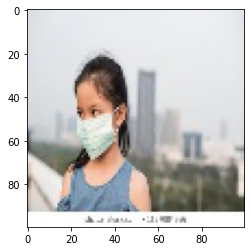

In [96]:
# displaying with mask image
img = mpimg.imread("/content/data/with_mask/with_mask_3544.jpg")
imgplot = plt.imshow(img)
plt.show()

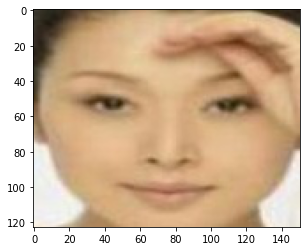

In [97]:
# displaying without mask image
img = mpimg.imread("/content/data/without_mask/without_mask_544.jpg")
imgplot = plt.imshow(img)
plt.show()

Image Processing
1. Resize Image
2. Convert image to numpy arrays


In [98]:
with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [99]:
type(data)

list

In [100]:
len(data)

7553

In [101]:
data[0]

array([[[247, 246, 252],
        [247, 246, 252],
        [247, 246, 252],
        ...,
        [247, 246, 252],
        [247, 246, 252],
        [247, 246, 252]],

       [[247, 246, 252],
        [247, 246, 251],
        [247, 246, 251],
        ...,
        [247, 246, 251],
        [247, 246, 251],
        [247, 246, 251]],

       [[247, 246, 252],
        [247, 246, 251],
        [247, 246, 251],
        ...,
        [247, 246, 251],
        [247, 246, 251],
        [247, 246, 251]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [102]:
type(data[0])

numpy.ndarray

In [103]:
data[0].shape

(128, 128, 3)

In [104]:
# converting image list and label list to many arrays
X = np.array(data)
Y = np.array(labels)

In [105]:
type(X)

numpy.ndarray

In [106]:
type(Y)

numpy.ndarray

In [107]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [110]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

Building a Convolutional Neural Networks (CNN)

In [111]:
import tensorflow as tf
from tensorflow import keras

In [112]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [113]:
# compile the model neural network
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['acc'])

In [114]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 6s 19ms/step - loss: 0.4262 - acc: 0.8131 - val_loss: 0.2740 - val_acc: 0.8942
Epoch 2/5
170/170 [==============================] - 3s 15ms/step - loss: 0.2812 - acc: 0.8869 - val_loss: 0.1809 - val_acc: 0.9223
Epoch 3/5
170/170 [==============================] - 2s 14ms/step - loss: 0.2192 - acc: 0.9147 - val_loss: 0.1716 - val_acc: 0.9355
Epoch 4/5
170/170 [==============================] - 2s 14ms/step - loss: 0.1933 - acc: 0.9231 - val_loss: 0.1645 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 2s 14ms/step - loss: 0.1686 - acc: 0.9347 - val_loss: 0.1582 - val_acc: 0.9355


Model Evaluation

In [115]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy:",accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2383 - acc: 0.9060
Test Accuracy: 0.9060224890708923


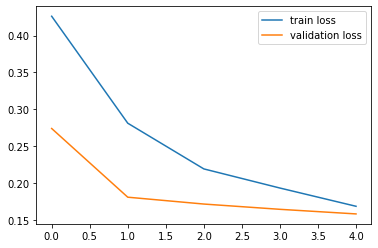

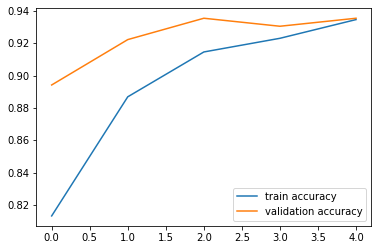

In [116]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the actual value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [119]:
from skimage import io

Path to be predict: https://images.unsplash.com/photo-1557296387-5358ad7997bb?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=914&q=80


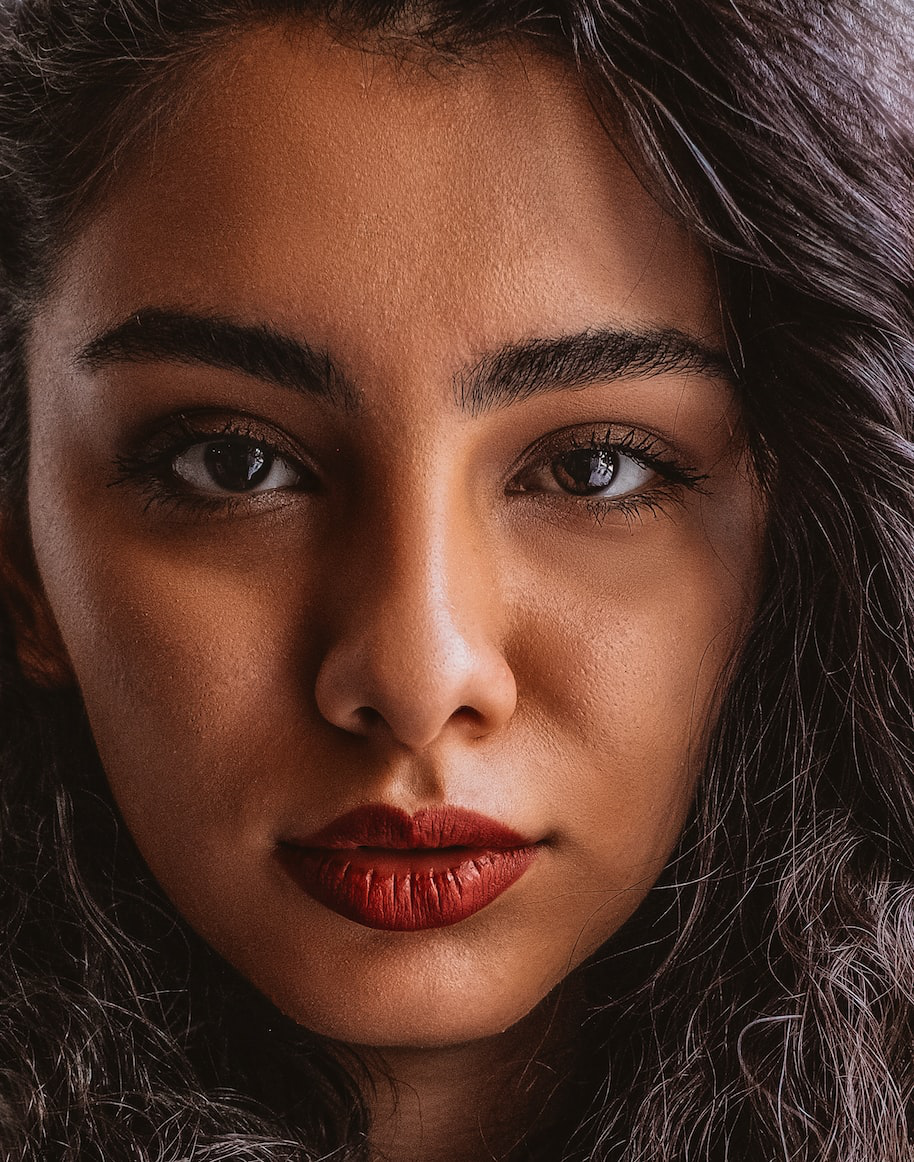

1/1 [==============================] - 0s 33ms/step
[[0.9860437  0.20219995]]
0
The person is not wearing a mask.


In [134]:
input_image_path = input("Path to be predict: ")

input_image = io.imread(input_image_path)

rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

cv2_imshow(rgb_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person is wearing a mask.")
else:
  print("The person is not wearing a mask.")